This is for testing SEI growth. We have noticed that:

In the case of "electron-migration limited" mechanism:
 1. The SEI fluctuates (decreases) for default parameters (i.e. without using any parameter sets) and the "Chen2020", "Ai2020", "Marquis2019", and "Mohtat2020" parameter sets.
 2. Get error when using "OKane2022" parameter set.

In the case of "ec reaction limited" mechanism:
The initial inner and outer SEI thicknesses must be greater than 3e-12.


In [17]:
import pybamm
param = pybamm.ParameterValues("OKane2022")
param["Nominal cell capacity [A.h]"]
param

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'Dead lithium decay constant [s-1]': 1e-06,
 'Dead lithium decay rate [s-1]': <function SEI_limited_dead_lithium_OKane2022 at 0x7fb89ae0dab0>,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008_arrhenius at 0x7fb89ae0e0e0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008_arrhenius at 0x7fb89ae0e050>,
 'Electron charge [C]': 1.602176634e-19,
 'Exchange-current density for plating [A.m-2]': <function plating_exch

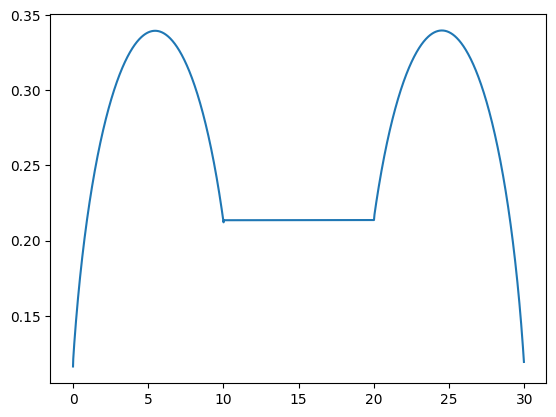

In [20]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
param = pybamm.ParameterValues("OKane2022")


# param['Initial inner SEI thickness [m]'] = 2.0e-12
# param['Initial outer SEI thickness [m]'] = 2.0e-12


cycle_no = 1
exp_CCCV = pybamm.Experiment(
    [("Charge at C/10 until 4.2 V",
        "Rest for 10 hours",
      "Discharge at C/10 until 2.5 V",
      )] * cycle_no
)

# Options of SEI Mechanism:
SEI_Mech = ["reaction limited", "solvent-diffusion limited",
            "interstitial-diffusion limited", "ec reaction limited", "electron-migration limited"]

# SEI Mechanism
index = 1
SPM_model = pybamm.lithium_ion.SPM(options={
    "SEI": SEI_Mech[index],
    "SEI porosity change": "true", })

sims_SPM = pybamm.Simulation(SPM_model, parameter_values=param,
                             experiment=exp_CCCV)
sol = sims_SPM.solve(initial_soc=0)

plt.plot(sol["Time [h]"].entries,
         sol['Exchange current density [A.m-2]'].entries[0])

In [12]:
plot = pybamm.QuickPlot(sims_SPM, time_unit='hours')

In [13]:
plot.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=29.97558585433252, step=0.2997558585433252),…

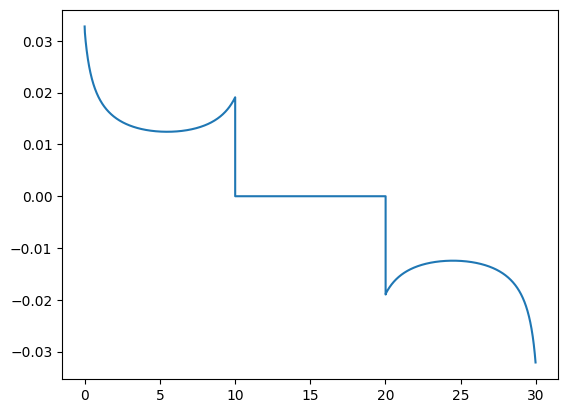

In [16]:
plt.plot(sol["Time [h]"].entries,
         sol["X-averaged reaction overpotential [V]"].entries)